In [148]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import requests

In [149]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8576722ac95441abf34e0e3e4fbdf7a9


In [150]:
# Import the datetime module from the datetime library
from datetime import datetime

In [151]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [152]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [158]:
# Create an empty list to hold the weather data
city_data=[]
# Print the beginning of the logging
print("Beginning Data Retrieval        ")
print("--------------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 13 | sakakah
Processing Record 2 of Set 13 | punta arenas
Processing Record 3 of Set 13 | nome
Processing Record 4 of Set 13 | thompson
Processing Record 5 of Set 13 | puerto ayora
Processing Record 6 of Set 13 | mataura
Processing Record 7 of Set 13 | mount isa
Processing Record 8 of Set 13 | vaini
Processing Record 9 of Set 13 | avarua
Processing Record 10 of Set 13 | fortuna
Processing Record 11 of Set 13 | humberto de campos
Processing Record 12 of Set 13 | kapaa
Processing Record 13 of Set 13 | lorengau
Processing Record 14 of Set 13 | chuy
Processing Record 15 of Set 13 | isangel
Processing Record 16 of Set 13 | hambantota
Processing Record 17 of Set 13 | lebu
Processing Record 18 of Set 13 | evensk
Processing Record 19 of Set 13 | rikitea
Processing Record 20 of Set 13 | vardo
Processing Record 21 of Set 13 | biryusinsk
Processing Record 22 of Set 13 | ushuaia
Processing Record 23 of Set

Processing Record 34 of Set 16 | dalvik
Processing Record 35 of Set 16 | yarada
Processing Record 36 of Set 16 | kutum
Processing Record 37 of Set 16 | tabiauea
City not found. Skipping...
Processing Record 38 of Set 16 | port elizabeth
Processing Record 39 of Set 16 | tura
Processing Record 40 of Set 16 | deputatskiy
Processing Record 41 of Set 16 | camacha
Processing Record 42 of Set 16 | kiyasovo
Processing Record 43 of Set 16 | palora
Processing Record 44 of Set 16 | brzeg dolny
Processing Record 45 of Set 16 | kahului
Processing Record 46 of Set 16 | namibe
Processing Record 47 of Set 16 | khatanga
Processing Record 48 of Set 16 | severo-kurilsk
Processing Record 49 of Set 16 | matay
Processing Record 50 of Set 16 | tumannyy
City not found. Skipping...
Processing Record 1 of Set 17 | muravlenko
Processing Record 2 of Set 17 | kaduna
Processing Record 3 of Set 17 | teya
Processing Record 4 of Set 17 | vicksburg
Processing Record 5 of Set 17 | linjiang
Processing Record 6 of Set 17 

Processing Record 12 of Set 20 | borger
Processing Record 13 of Set 20 | bonavista
Processing Record 14 of Set 20 | wapi pathum
Processing Record 15 of Set 20 | altay
Processing Record 16 of Set 20 | jelenia gora
Processing Record 17 of Set 20 | tukrah
Processing Record 18 of Set 20 | veraval
Processing Record 19 of Set 20 | funadhoo
Processing Record 20 of Set 20 | luderitz
Processing Record 21 of Set 20 | dudinka
Processing Record 22 of Set 20 | usinsk
Processing Record 23 of Set 20 | caceres
Processing Record 24 of Set 20 | cedar lake
Processing Record 25 of Set 20 | sao mateus
Processing Record 26 of Set 20 | paamiut
Processing Record 27 of Set 20 | komsomolskiy
Processing Record 28 of Set 20 | maarianhamina
Processing Record 29 of Set 20 | susurluk
Processing Record 30 of Set 20 | ostrovnoy
Processing Record 31 of Set 20 | skibbereen
Processing Record 32 of Set 20 | riyadh
Processing Record 33 of Set 20 | yellowknife
Processing Record 34 of Set 20 | prince rupert
Processing Record

Processing Record 49 of Set 23 | alekseyevka
Processing Record 50 of Set 23 | kailua
Processing Record 1 of Set 24 | springbok
Processing Record 2 of Set 24 | pavlohrad
Processing Record 3 of Set 24 | tianpeng
Processing Record 4 of Set 24 | itarema
Processing Record 5 of Set 24 | asyut
Processing Record 6 of Set 24 | meyungs
City not found. Skipping...
Processing Record 7 of Set 24 | hun
Processing Record 8 of Set 24 | khani
Processing Record 9 of Set 24 | bukama
Processing Record 10 of Set 24 | ejura
Processing Record 11 of Set 24 | lasa
Processing Record 12 of Set 24 | laukaa
Processing Record 13 of Set 24 | ankpa
Processing Record 14 of Set 24 | sembe
Processing Record 15 of Set 24 | linhares
Processing Record 16 of Set 24 | buraydah
Processing Record 17 of Set 24 | gorontalo
Processing Record 18 of Set 24 | uspenskoye
Processing Record 19 of Set 24 | soe
Processing Record 20 of Set 24 | oussouye
Processing Record 21 of Set 24 | kuche
City not found. Skipping...
Processing Record 2

In [160]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sakakah,29.9697,40.2064,62.60,36,0,13.80,SA,2021-04-09 04:47:33
1,Punta Arenas,-53.1500,-70.9167,44.60,81,75,4.61,CL,2021-04-09 04:47:33
2,Nome,64.5011,-165.4064,-0.40,60,1,4.61,US,2021-04-09 04:47:33
3,Thompson,55.7435,-97.8558,41.00,52,40,3.44,CA,2021-04-09 04:47:34
4,Puerto Ayora,-0.7393,-90.3518,75.99,98,45,2.68,EC,2021-04-09 04:47:34
5,Mataura,-46.1927,168.8643,63.27,58,0,1.05,NZ,2021-04-09 04:47:34
6,Mount Isa,-20.7333,139.5000,95.00,20,21,9.22,AU,2021-04-09 04:47:35
7,Vaini,-21.2000,-175.2000,77.00,83,40,8.05,TO,2021-04-09 04:47:35
8,Avarua,-21.2078,-159.7750,77.00,94,90,3.44,CK,2021-04-09 04:47:36
9,Fortuna,40.5982,-124.1573,46.99,93,1,5.75,US,2021-04-09 04:47:36


In [171]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [172]:
city_data_df = city_data_df[new_column_order]

In [174]:
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sakakah,SA,2021-04-09 04:47:33,29.9697,40.2064,62.60,36,0,13.80
1,Punta Arenas,CL,2021-04-09 04:47:33,-53.1500,-70.9167,44.60,81,75,4.61
2,Nome,US,2021-04-09 04:47:33,64.5011,-165.4064,-0.40,60,1,4.61
3,Thompson,CA,2021-04-09 04:47:34,55.7435,-97.8558,41.00,52,40,3.44
4,Puerto Ayora,EC,2021-04-09 04:47:34,-0.7393,-90.3518,75.99,98,45,2.68


In [175]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Date into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [176]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

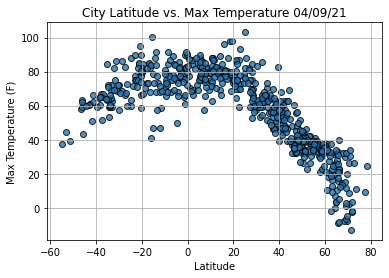

In [179]:
# Import the time module
import time

# Build tje scatter plot for latitude vs max temp
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

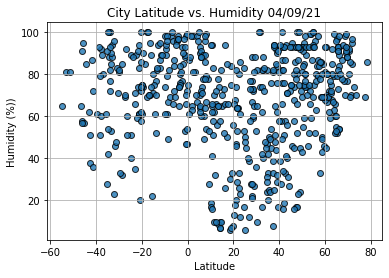

In [180]:
# Build tje scatter plot for latitude vs humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

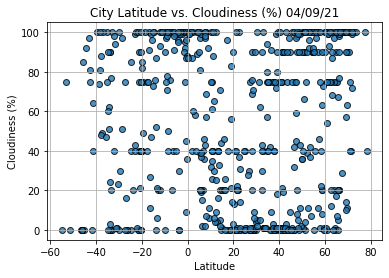

In [181]:
# Build tje scatter plot for latitude vs cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph 
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()